In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import cv2, glob

no_path = 'no/*'
yes_path = 'yes/*'

# 0-no, 1-yes
X_data, y_data = [],[]

for img in glob.glob(no_path):
    X_data.append(cv2.resize(cv2.imread(img),(100,100)))
    y_data.append(0)
    
for img in glob.glob(yes_path):
    X_data.append(cv2.resize(cv2.imread(img),(100,100)))
    y_data.append(1)    
    
X_data = np.array(X_data)
y_data = np.array(y_data)

(253, 100, 100, 3) (253,)


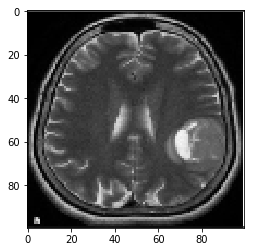

In [3]:
print(X_data.shape, y_data.shape)
plt.imshow(X_data[-1],cmap='Greys_r')

In [4]:
from keras.layers import Flatten,Dense,Dropout
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
from keras.applications.vgg16 import VGG16, preprocess_input

vgg16_weight_path = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100,100) + (3,))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))

model.layers[0].trainable = False

model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=1e-4),metrics=['accuracy'])

model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 9218      
Total params: 14,723,906
Trainable params: 9,218
Non-trainable params: 14,714,688
_________________________________________________________________


In [7]:
EPOCHS = 30
es = EarlyStopping(monitor='val_acc',mode='max',patience=6)

In [8]:
# history = model.fit_generator()
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=30, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=True)

X_data = X_data.reshape(253, 100, 100, 3)


In [11]:
from keras.utils import np_utils

print("Total:",X_data.shape)
X_train = X_data[:175,:,:,:]
train_datagen.fit(X_train)

X_test = X_data[175:,:,:,:]
print("Train:",X_train.shape,"\nTest:",X_test.shape)

y_train = y_data[:175]
y_test = y_data[175:]
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)

print("y train:",y_train.shape,"\ny train:",y_test.shape)

Total: (253, 100, 100, 3)
Train: (175, 100, 100, 3) 
Test: (78, 100, 100, 3)
y train: (175, 2) 
y train: (78, 2)


In [12]:
from keras.callbacks import ModelCheckpoint

history = model.fit_generator(
    train_datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=X_train.shape[0]/32,
    epochs=,
    validation_data=(X_test, y_test),
    callbacks=[ModelCheckpoint('VGG16-transferlearning.model', monitor='val_acc', save_best_only=True)]
)

Epoch 1/10
6/5 [================================] - 76s - loss: 7.4576 - acc: 0.4815 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/10
6/5 [================================] - 74s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/10
4/5 [====================>.........] - ETA: 19s - loss: 8.0590 - acc: 0.5000

KeyboardInterrupt: 